In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
print(os.listdir("../input"))

['dog-breed-identification']


In [3]:
labels=pd.read_csv("../input/dog-breed-identification/labels.csv")

In [4]:
labels


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [5]:
filenames = os.listdir("../input/dog-breed-identification/train/train")

In [6]:
filenames.sort()

In [7]:
filenames

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg',
 '004396df1acd0f1247b740ca2b14616e.jpg',
 '0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '00693b8bc2470375cc744a6391d397ec.jpg',
 '006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 '0075dc49dab4024d12fafe67074d8a81.jpg',
 '00792e341f3c6eb33663e415d0715370.jpg',
 '007b5a16db9d9ff9d7ad39982703e429.jpg',
 '007b8a07882822475a4ce6581e70b1f8.jpg',
 '007ff9a78eba2aebb558afea3a51c469.jpg',
 '008887054b18ba3c7601792b6a453cc3.jpg',
 '008b1271ed1addaccf93783b39deab45.jpg',
 '008ba178d6dfc1a583617470d19c1673.jpg',
 '009509be3ca7cce0ff9e37c8b09b1125.jpg',
 '0097c6242c6f3071762d9f85c3ef1b2f.jpg',
 '00a338a92e4e7b

In [8]:
df=pd.DataFrame({
    'filename': filenames,
    'category': labels['breed']
})

In [9]:
df.tail()

,filename,category
10217,ffd25009d635cfd16e793503ac5edef0.jpg,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f.jpg,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f.jpg,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac.jpg,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae.jpg,chesapeake_bay_retriever


In [10]:
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


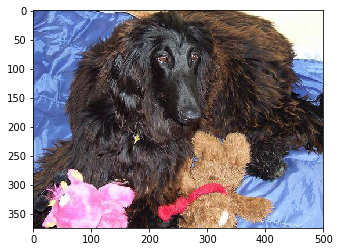

In [12]:
sample=random.choice(filenames)
image = load_img("../input/dog-breed-identification/train/train/"+sample)
plt.imshow(image)


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)       

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
callbacks = [earlystop, learning_rate_reduction]

In [18]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [19]:
print(train_df.shape)
print(validate_df.shape)

(8177, 2)
(2045, 2)


In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe( 
    train_df,
    "../input/dog-breed-identification/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=8
)

Found 8177 validated image filenames belonging to 120 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/dog-breed-identification/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=8
)

Found 2045 validated image filenames belonging to 120 classes.


In [22]:
total_validate=validate_df.shape[0]
total_train = train_df.shape[0]

In [23]:
history = model.fit_generator(
    train_generator, 
    epochs=15,
    validation_data=validation_generator,
    validation_steps=total_validate//8,
    steps_per_epoch=total_train//8,
    callbacks=callbacks
)

Epoch 1/15
1022/1022 [==============================] - 176s 172ms/step - loss: 5.5392 - accuracy: 0.0154 - val_loss: 4.5113 - val_accuracy: 0.0240
Epoch 2/15
   1/1022 [..............................] - ETA: 53s - loss: 5.1265 - accuracy: 0.0000e+00

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1022/1022 [==============================] - 154s 151ms/step - loss: 5.0813 - accuracy: 0.0249 - val_loss: 3.8304 - val_accuracy: 0.0378
Epoch 3/15
1022/1022 [==============================] - 153s 149ms/step - loss: 4.8094 - accuracy: 0.0277 - val_loss: 5.3492 - val_accuracy: 0.0388
Epoch 4/15
1022/1022 [==============================] - 153s 150ms/step - loss: 4.6687 - accuracy: 0.0364 - val_loss: 4.8147 - val_accuracy: 0.0481
Epoch 5/15
1022/1022 [==============================] - 152s 149ms/step - loss: 4.5368 - accuracy: 0.0426 - val_loss: 4.0808 - val_accuracy: 0.0565
Epoch 6/15
1022/1022 [==============================] - 152s 149ms/step - loss: 4.5356 - accuracy: 0.0424 - val_loss: 4.8283 - val_accuracy: 0.0349
Epoch 7/15
1022/1022 [==============================] - 155s 152ms/step - loss: 4.4121 - accuracy: 0.0491 - val_loss: 4.2363 - val_accuracy: 0.0717
Epoch 8/15
1022/1022 [==============================] - 154s 151ms/step - loss: 4.3623 - accuracy: 0.0531 - val_loss: 3.811

In [24]:
model.save_weights("model.h1")

In [25]:
test_filenames = os.listdir("../input/dog-breed-identification/test/test")
test_filenames.sort()
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [26]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/dog-breed-identification/test/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(256,256),
    batch_size=8,
    shuffle=False
)

Found 10357 validated image filenames.


In [27]:
total_test=test_df.shape[0]
predict = model.predict_generator(test_generator, steps=np.ceil(total_test/8))

In [28]:
predict

array([[0.00058289, 0.02741555, 0.00159959, ..., 0.02081834, 0.04409915,
        0.00376034],
       [0.00048452, 0.00872302, 0.00114164, ..., 0.00759077, 0.01971347,
        0.00423855],
       [0.00125654, 0.03454269, 0.00436322, ..., 0.02266769, 0.02030848,
        0.00146408],
       ...,
       [0.00128842, 0.01866355, 0.00267023, ..., 0.0080922 , 0.00205002,
        0.01862216],
       [0.00389964, 0.01798436, 0.01315365, ..., 0.00542966, 0.00245544,
        0.0197346 ],
       [0.0017503 , 0.03094235, 0.00847828, ..., 0.02083275, 0.01667607,
        0.00341467]], dtype=float32)

In [29]:
predict.shape

(10357, 120)

In [30]:
ans=pd.read_csv("../input/dog-breed-identification/sample_submission.csv")

In [31]:
ans.shape

(10357, 121)

In [32]:
ans.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [33]:
labels = (train_generator.class_indices)
labels = list(labels.keys())
df = pd.DataFrame(data=predict,
                 columns=labels)

columns = list(df)
columns.sort()
df = df.reindex(columns=columns)

filenames = ans["id"]
df["id"]  = filenames

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.000583,0.027416,0.001600,0.013157,0.016061,0.000420,0.001192,0.012869,0.002863,...,0.003139,0.004369,0.001665,0.008879,0.004011,0.023189,0.009960,0.020818,0.044099,0.003760
1,00102ee9d8eb90812350685311fe5890,0.000485,0.008723,0.001142,0.004865,0.003522,0.000635,0.001564,0.014285,0.006951,...,0.006250,0.009128,0.002131,0.011059,0.003924,0.010225,0.015181,0.007591,0.019713,0.004239
2,0012a730dfa437f5f3613fb75efcd4ce,0.001257,0.034543,0.004363,0.008695,0.009909,0.001920,0.001597,0.006818,0.001496,...,0.001595,0.016098,0.000446,0.003440,0.004801,0.006764,0.011120,0.022668,0.020308,0.001464
3,001510bc8570bbeee98c8d80c8a95ec1,0.001682,0.030469,0.014292,0.008485,0.009615,0.027118,0.004419,0.012372,0.007924,...,0.003397,0.002399,0.001511,0.009040,0.007159,0.011319,0.008717,0.020970,0.004097,0.004898
4,001a5f3114548acdefa3d4da05474c2e,0.004330,0.044100,0.014581,0.006676,0.014566,0.028210,0.001348,0.005496,0.004563,...,0.002474,0.008176,0.000737,0.007228,0.009415,0.002724,0.009422,0.031089,0.004577,0.001753


In [34]:
df.to_csv("submission1.csv",index=False)

In [35]:
ans.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
